## Detecção de múltiplos objetos em imagens com deep learning
***

Ao inves de apenas classificar uma imagem, iremos detectar N objetos em uma única imagem usando deep learning

***

In [1]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

In [2]:
# Inicializar a lista de labels do mobilenet SSD
CLASSES = [
    "background", "aeroplane", "bicycle", "bird", "boat",
    "bottle", "bus", "car", "cat", "chair", "cow", "diningtable",
    "dog", "horse", "motorbike", "person", "pottedplant", "sheep",
    "sofa", "train", "tvmonitor"
]

In [3]:
# Cria as cores para cada label ao inserir no imagem
COLORS = np.random.uniform(0, 255, size=(len(CLASSES), 3))

In [4]:
# Carrega o modelo
modelo = cv.dnn.readNetFromCaffe(
    "./model/MobileNetSSD.prototxt",
    "./model/MobileNetSSD.caffemodel"
)

In [5]:
# Carrega a imagem de entrada
imagem = cv.imread("./imagens/cars.jpg")
imagem_colorida = cv.cvtColor(imagem, cv.COLOR_BGR2RGB)
(altura, largura) = imagem_colorida.shape[:2]

In [6]:
# Redimensiona para 300x300 e normalizada a imagem
dimensoes = (300, 300)
escala_da_imagem = 0.007843
mean = 127.5 # Estes são valores médios de subtração.
imagem_formatada = cv.dnn.blobFromImage(
    cv.resize(imagem_colorida, dimensoes),
    escala_da_imagem,
    dimensoes,
    mean,
    swapRB=True
)

In [7]:
# Passa a imagem pela rede para obter detecções e previsões
modelo.setInput(imagem_formatada)
deteccoes = modelo.forward()

In [8]:
# Loop de detecções
for i in np.arange(0, deteccoes.shape[2]):
    # Extrai a probabilidade associada com as previsões
    confianca = deteccoes[0, 0, i, 2]
    
    # Filtra detecções fracas garantindo que a confiança seja maior do que a confiança mínima
    confianca_minima = 0.9
    if confianca > confianca_minima:
        # Extrai o índice do rótulo de classe das detecções, então computa as coordenadas (x, y)
        # da caixa delimitadora para o objeto
        indice = int(deteccoes[0, 0, i, 1])
        caixa = deteccoes[0, 0, i, 3:7] * np.array([largura, altura, largura, altura])
        (startX, startY, endX, endY) = caixa.astype("int")
        
        # Mostra as previsões
        label = "{}: {:.2f}%".format(CLASSES[indice], confianca * 100)
        print("Label {}".format(label))
        cv.rectangle(imagem_colorida, (startX, startY), (endX, endY), COLORS[indice], 2)
        
        if startY - 15 > 15:
            y = startY - 15
        else:
            y = startY + 15

        cv.putText(imagem_colorida, label, (startX, y), cv.FONT_HERSHEY_SIMPLEX, 0.5, COLORS[indice], 2)

Label car: 99.92%
Label car: 99.42%


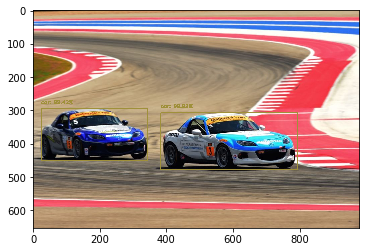

In [9]:
# Mostrar a imagem
plt.imshow(imagem_colorida)
plt.show()